In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer



In [3]:
df = pd.read_csv("train.csv",usecols=["Age","Fare", "Survived"])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


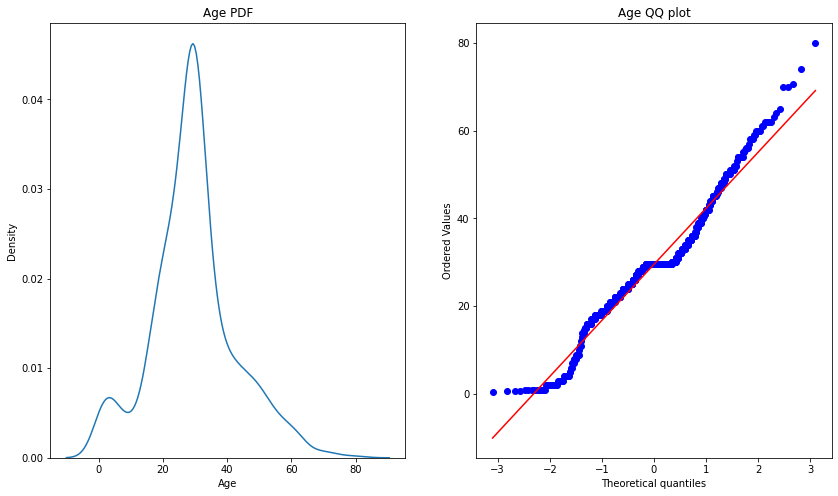

In [17]:
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.distplot(X_train["Age"],hist=False)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"],dist="norm",plot = plt)
plt.title("Age QQ plot")
plt.show()

/home/deependra/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


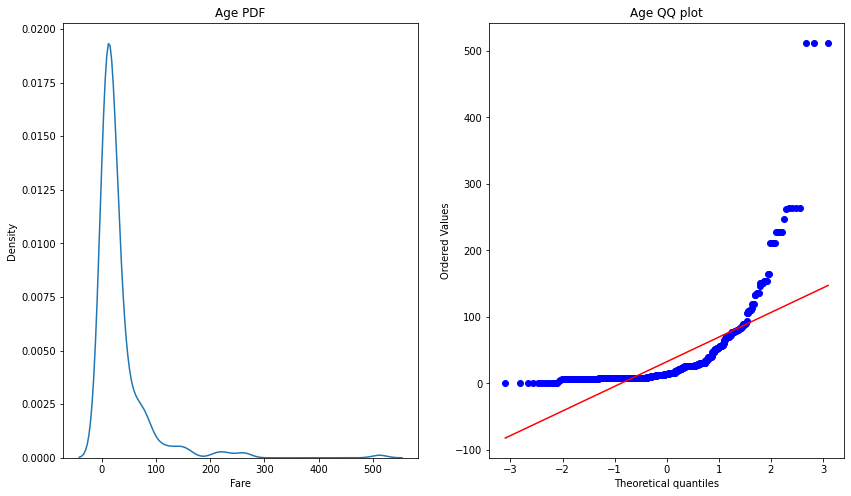

In [18]:
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.distplot(X_train["Fare"],hist=False)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"],dist="norm",plot = plt)
plt.title("Age QQ plot")
plt.show()

In [19]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [20]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred1))


print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [21]:
trf = FunctionTransformer(func=np.log1p)

In [22]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [23]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

In [24]:
clf3.fit(X_train_transformed,y_train)
clf4.fit(X_train_transformed,y_train)

y_pred3 = clf3.predict(X_test_transformed)
y_pred4 = clf4.predict(X_test_transformed)

print("Accuracy LR log",accuracy_score(y_test,y_pred3))


print("Accuracy DT log",accuracy_score(y_test,y_pred4))

Accuracy LR log 0.6815642458100558
Accuracy DT log 0.6759776536312849


In [25]:
X_tranformed = trf.fit_transform(X)

In [27]:
clf5 = LogisticRegression()
clf6 = DecisionTreeClassifier()



print("LR", cross_val_score(clf5,X_tranformed,y,scoring = "accuracy",cv = 10).mean())

print("DT", cross_val_score(clf6,X_tranformed,y,scoring = "accuracy",cv = 10).mean())


LR 0.678027465667915
DT 0.6599999999999999


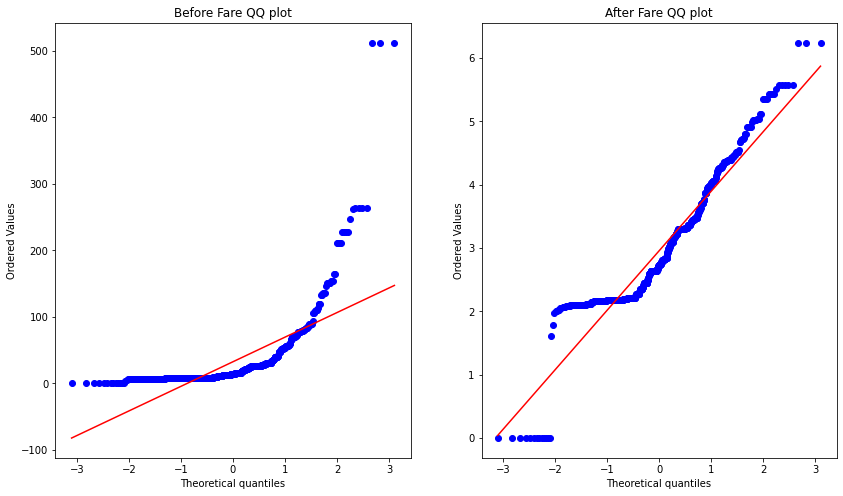

In [28]:
plt.figure(figsize=(14,8))
plt.subplot(121)
stats.probplot(X_train["Fare"],dist="norm",plot = plt)
plt.title("Before Fare QQ plot")

plt.subplot(122)
stats.probplot(X_train_transformed["Fare"],dist="norm",plot = plt)
plt.title("After Fare QQ plot")
plt.show()

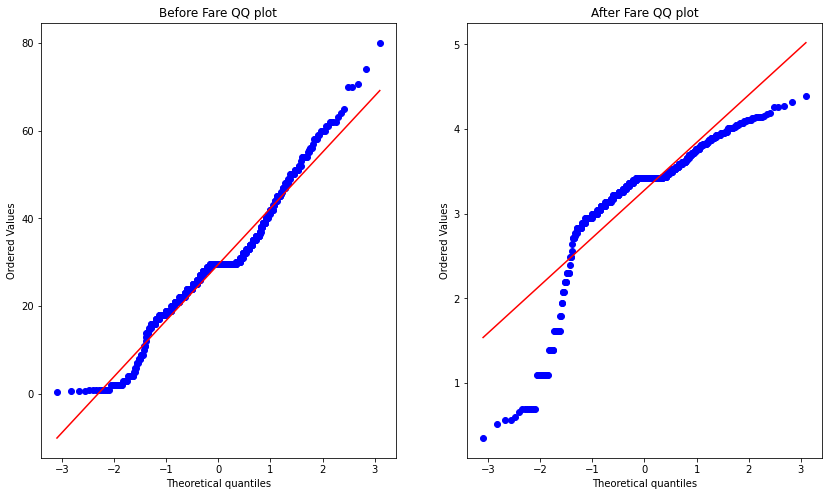

In [29]:
plt.figure(figsize=(14,8))
plt.subplot(121)
stats.probplot(X_train["Age"],dist="norm",plot = plt)
plt.title("Before Fare QQ plot")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"],dist="norm",plot = plt)
plt.title("After Fare QQ plot")
plt.show()

In [35]:
trf2 = ColumnTransformer([("log",FunctionTransformer(np.log1p),["Fare"])],remainder="passthrough")

In [36]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [37]:
clf7 = LogisticRegression()
clf8 = DecisionTreeClassifier()

In [39]:
clf7.fit(X_train_transformed2,y_train)
clf8.fit(X_train_transformed2,y_train)

y_pred7 = clf7.predict(X_test_transformed2)
y_pred8 = clf8.predict(X_test_transformed2)

print("Accuracy LR log",accuracy_score(y_test,y_pred7))


print("Accuracy DT log",accuracy_score(y_test,y_pred8))

Accuracy LR log 0.6703910614525139
Accuracy DT log 0.659217877094972


In [40]:
X_tranformed2 = trf2.fit_transform(X)

clf9 = LogisticRegression()
clf10 = DecisionTreeClassifier()



print("LR", cross_val_score(clf9,X_tranformed2,y,scoring = "accuracy",cv = 10).mean())

print("DT", cross_val_score(clf10,X_tranformed2,y,scoring = "accuracy",cv = 10).mean())


LR 0.6712609238451936
DT 0.6588514357053683


In [79]:
import math

In [57]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf3 = ColumnTransformer([("log",FunctionTransformer(transform),["Fare"])],remainder="passthrough")
    
    X_trans = trf3.fit_transform(X)
    
    clf11 = LogisticRegression()
    
    print("Accuracy Score",cross_val_score(clf11,X_trans,y,scoring = "accuracy",cv = 10).mean())
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(X["Fare"],dist = "norm",plot = plt)
    plt.title("Fare before transformation")
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist = "norm", plot = plt)
    plt.title("Fare after transformation")
    
    plt.show()

Accuracy Score 0.61729088639201


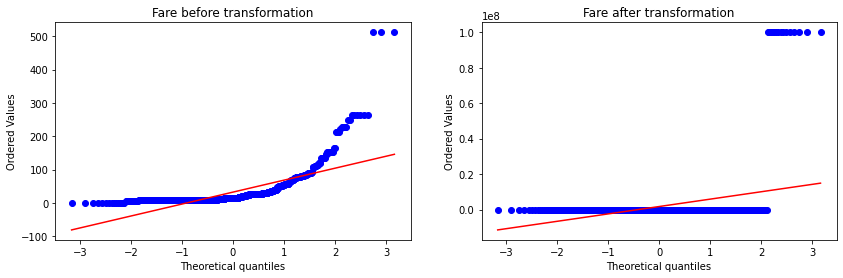

In [60]:
apply_transform(lambda x:1/(x+0.00000001))

Accuracy Score 0.6645318352059926


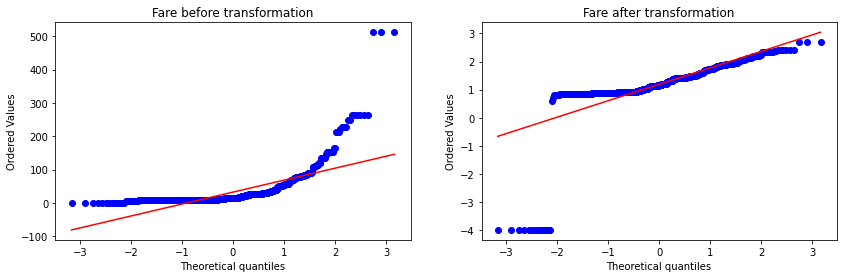

In [89]:
apply_transform(lambda x: np.log10(x+0.0001))